# 多元线性回归训练

使用多元线性回归来预测广告和销量的关系
"","TV","Radio","Newspaper","Sales" 这是数据集中的全部的内容了
首先要看清数据，对数据进行分析

In [2]:
import pandas as pd

data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

画散点图，了解数据，以及置信度为0.95的置信区间

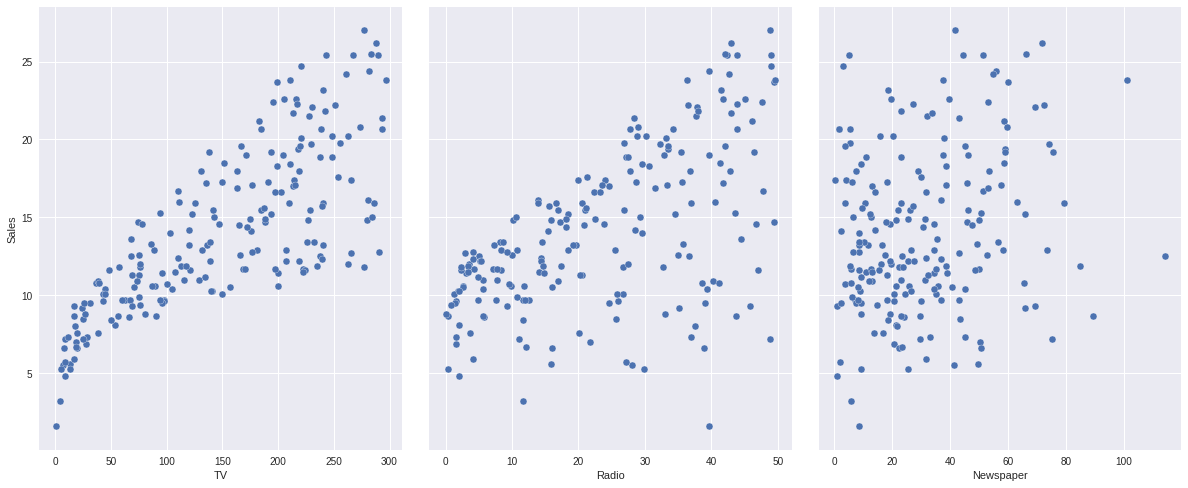

In [8]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.8)  
plt.show()

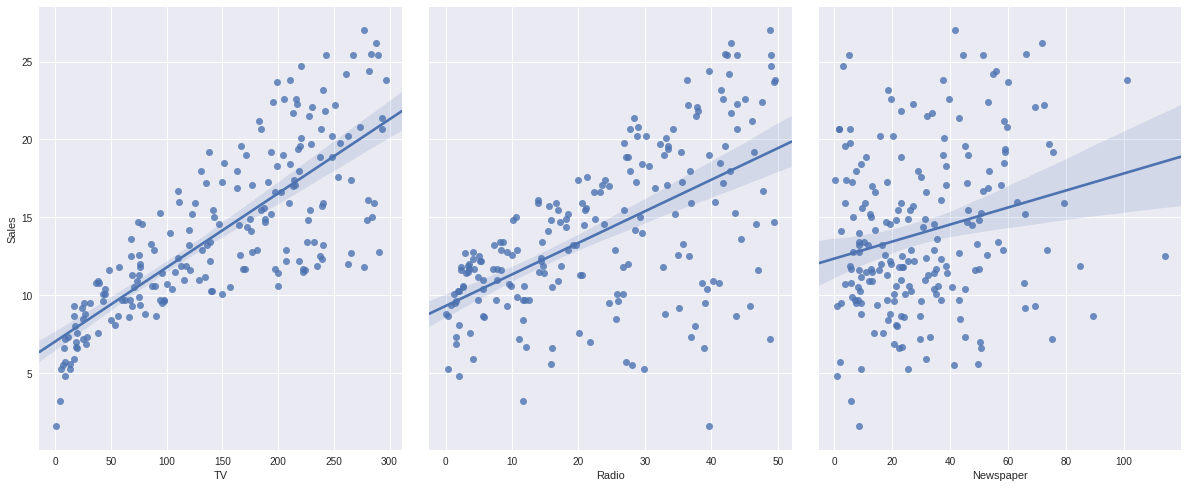

In [9]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.8, kind='reg')  
plt.show() 

划分特征和标签以及测试机和训练集

In [11]:
feature_cols = ['TV','Radio','Newspaper']
X = data[feature_cols]
print X.head()

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4


In [12]:
y = data['Sales']
print y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [16]:
from sklearn.cross_validation import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(150, 3)
(150,)
(50, 3)
(50,)


引入线性回归模型，并训练模型

In [18]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
print model
print linreg.intercept_
print linreg.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [19]:
zip(feature_cols, linreg.coef_)

[('TV', 0.046564567874150295),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.0034504647111804343)]

对测试集进行预测并打印结果查看

In [20]:
y_pred = linreg.predict(X_test)
print y_pred
print type(y_pred)

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679]
<type 'numpy.ndarray'>


计算误差

In [21]:
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print "RMSE by hand:",sum_erro

RMSE by hand: 1.40465142303


画图表示，查看一下预测的结果

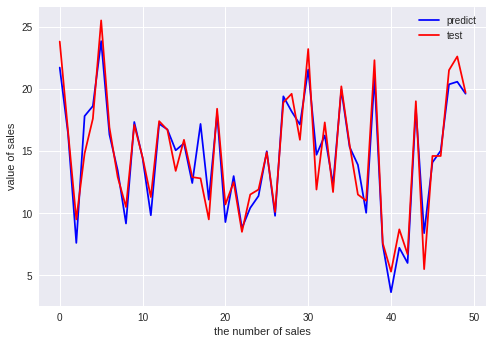

In [22]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

以上就是最基本的多元线性回归了，更详细可以对参数进行训练，特征选择等等。